# Web Scraping using Beautiful Soup

# 1. Import important libraries

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import csv


# 2. Scraping the HTML from web

In [3]:
req = requests.get("https://www.trustpilot.com/review/www.americanexpress.com?page=1")
content = req.content
soup = BeautifulSoup(content, "lxml")
names = soup.find_all('div', attrs={'class': 'consumer-information__name'})
headers = soup.find_all('h2', attrs={'class':'review-content__title'})
bodies = soup.find_all('p', attrs={'class':'review-content__text'})
ratings = soup.find_all('div', attrs={'class':'star-rating star-rating--medium'})
dates = soup.find_all('div', attrs={'class':'review-content-header__dates'})

# 3. Check scrapped data  

In [5]:
names[0]

<div class="consumer-information__name" v-pre="">
            Alex Thornton
        </div>

In [6]:
headers[0]

<h2 class="review-content__title">
<a class="link link--large link--dark" data-track-link="{'target': 'Single review', 'name': 'review-title'}" href="/reviews/5f217dcf1a5a690a041aee53">I have been a Platinum customer for…</a>
</h2>

In [7]:
bodies[0]

<p class="review-content__text">
                I have been a Platinum customer for years. Today I got a call out of the blue notifying me that in order to continue using my card I need to make a payment as they're uncomfortable with my spending this month. This is despite me having (unused) credit limits with other providers which are 7 times as large.<br/><br/>If you don't want me to spend on my Amex card, that's fine by me. Given where we are with the global pandemic I was trying to justify keeping my account - thanks, you made that decision easier.
            </p>

In [8]:
ratings[0]

<div class="star-rating star-rating--medium">
<img alt="1 star: Bad" src="//cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-1.svg"/>
</div>

In [9]:
dates[0]

<div class="review-content-header__dates">
<script data-initial-state="review-dates" type="application/json">
{"publishedDate":"2020-07-29T13:46:55Z","updatedDate":"2020-07-29T13:47:46Z","reportedDate":null}
</script>
<review-dates :published-date="publishedDate" :reported-date="reportedDate" :updated-date="updatedDate"></review-dates>
</div>

# 4. Creating lists for saving title and content of each review

In [10]:
title = []
review = []
for x in range(len(headers)):
        title.append(headers[x].get_text().strip())
        review.append(bodies[x].get_text().strip())

In [13]:
title[0]

'I have been a Platinum customer for…'

In [14]:
review[0]

"I have been a Platinum customer for years. Today I got a call out of the blue notifying me that in order to continue using my card I need to make a payment as they're uncomfortable with my spending this month. This is despite me having (unused) credit limits with other providers which are 7 times as large.If you don't want me to spend on my Amex card, that's fine by me. Given where we are with the global pandemic I was trying to justify keeping my account - thanks, you made that decision easier."

# 5. Saving the scrapped data

In [15]:
data = {'Title':title, 'Review':review}

In [16]:
data['Title'][0:5]

['I have been a Platinum customer for…',
 'Just great!',
 'I have been a American Express platinum…',
 'I applied and was accepted on an 18…',
 'American Express no longer cares about…']

In [17]:
data["Review"][0:5]

["I have been a Platinum customer for years. Today I got a call out of the blue notifying me that in order to continue using my card I need to make a payment as they're uncomfortable with my spending this month. This is despite me having (unused) credit limits with other providers which are 7 times as large.If you don't want me to spend on my Amex card, that's fine by me. Given where we are with the global pandemic I was trying to justify keeping my account - thanks, you made that decision easier.",
 'Been with American Express for a large number of years and customer service is second to none. Thanks again!',
 'I have been a American Express platinum card holder for over 40 years... Customer Service is horrific ..especially from India.The customer service provided by Amex was the very best in the business in past years...not any moreSad that after many years I might have to leave an excellent company with Bad customer service.',
 "I applied and was accepted on an 18 month 0% interest 

In [18]:
# Making dataframe from dictionary

dataframe = pd.DataFrame.from_dict(data)
dataframe

,Title,Review
0,I have been a Platinum customer for…,I have been a Platinum customer for years. Tod...
1,Just great!,Been with American Express for a large number ...
2,I have been a American Express platinum…,I have been a American Express platinum card h...
3,I applied and was accepted on an 18…,I applied and was accepted on an 18 month 0% i...
4,American Express no longer cares about…,American Express no longer cares about their c...
5,Amex is too big to care about their customers,American Express has ZERO customer service the...
6,I am so annoyed with AMEX for…,I am so annoyed with AMEX for prequalifying me...
7,Fast customer response,Very good at sorting out missing 'shop small' ...
8,American Express is not the company it…,American Express is not the company it was. I ...
9,Rubbish,Rubbish. Have been with them for years. Paid m...


In [19]:
print(len(title), len(review))

20 20


In [23]:
# Saving dataframe as a csv file named trustpilot

dataframe.to_csv(r'Beautiful Soup.csv', index = False)

# 6. Making WordCloud

In [33]:
# Import trustpilot csv file with name trust_pilot

data = pd.read_csv('Beautiful Soup Data.csv', index_col=0)

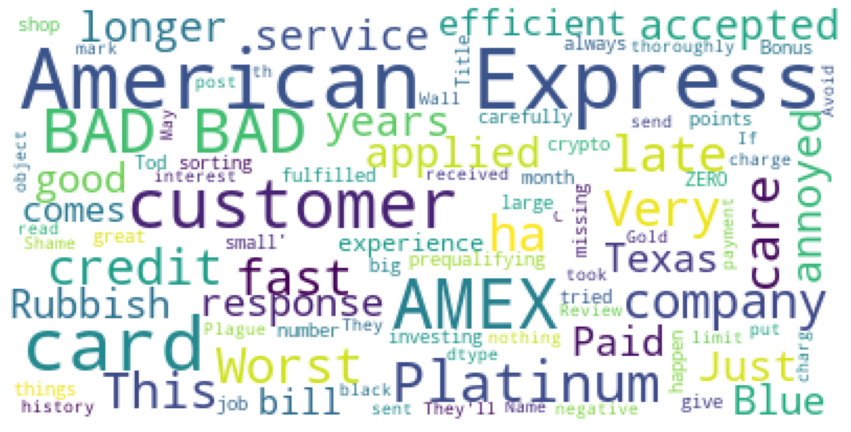

In [32]:
# Making wordcloud of reviews

cloud= WordCloud(background_color='white',stopwords= STOPWORDS, max_words=100,
                    max_font_size=50,random_state=1).generate(str(data['Review']))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')
plt.show()